In [38]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.patheffects as PathEffects
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split



In [39]:
df = pd.read_csv('genre.csv')

# прбираємо перші два стовпці 
df = df.iloc[:, 2:]

# вибираємо лише ті строки, 
# в яких мітки класів рівняються 5 і 10 
# що відповідають жанрам HipHop і Rock відповідно
df = df.query('Class == 5 | Class == 10').reset_index(drop=True)

In [40]:
df['Popularity'] = df['Popularity'].fillna(df['Popularity'].median())
df['key'] = df['key'].fillna(df['key'].median())
df['instrumentalness'] = df['instrumentalness'].fillna(df['instrumentalness'].median())

df.loc[df['Class'] == 5, 'Class'] = 0
df.loc[df['Class'] == 10, 'Class'] = 1

In [41]:
# оскільки міток класа 1 майже у 3,5 раза більше ніж міток 0
# потрібно урівняти кількість міток обох класів
# оскільки класифікатор уже покаже непогані результати просто на будь-який запит відповідаючи 1
df  = pd.concat([df[df['Class'] == 0], df[df['Class'] == 1][:1500]]).reset_index(drop=True)
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.001105,0.0849,0.899,134.071,234596.0,4,0
1,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.001105,0.1220,0.569,107.033,173968.0,4,0
2,70.0,0.852,0.730,1.0,-5.803,1,0.0579,0.021900,0.001105,0.3360,0.394,92.506,157693.0,4,0
3,29.0,0.805,0.448,7.0,-9.452,1,0.1120,0.060200,0.000002,0.1130,0.775,160.018,138000.0,4,0
4,42.0,0.858,0.525,6.0,-7.332,1,0.1480,0.044300,0.007380,0.1970,0.351,170.875,193962.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,48.0,0.566,0.963,1.0,-3.835,0,0.0500,0.000618,0.000068,0.3610,0.861,130.059,182065.0,4,1
2943,77.0,0.765,0.837,1.0,-3.113,0,0.0320,0.001070,0.000011,0.0801,0.721,122.028,195973.0,4,1
2944,40.0,0.641,0.801,7.0,-4.092,0,0.0467,0.288000,0.001105,0.3420,0.516,127.955,204375.0,4,1
2945,66.0,0.607,0.142,7.0,-23.455,1,0.0382,0.843000,0.000197,0.1210,0.305,118.867,220400.0,4,1


In [42]:
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.001105,0.0849,0.899,134.071,234596.0,4,0
1,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.001105,0.1220,0.569,107.033,173968.0,4,0
2,70.0,0.852,0.730,1.0,-5.803,1,0.0579,0.021900,0.001105,0.3360,0.394,92.506,157693.0,4,0
3,29.0,0.805,0.448,7.0,-9.452,1,0.1120,0.060200,0.000002,0.1130,0.775,160.018,138000.0,4,0
4,42.0,0.858,0.525,6.0,-7.332,1,0.1480,0.044300,0.007380,0.1970,0.351,170.875,193962.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,48.0,0.566,0.963,1.0,-3.835,0,0.0500,0.000618,0.000068,0.3610,0.861,130.059,182065.0,4,1
2943,77.0,0.765,0.837,1.0,-3.113,0,0.0320,0.001070,0.000011,0.0801,0.721,122.028,195973.0,4,1
2944,40.0,0.641,0.801,7.0,-4.092,0,0.0467,0.288000,0.001105,0.3420,0.516,127.955,204375.0,4,1
2945,66.0,0.607,0.142,7.0,-23.455,1,0.0382,0.843000,0.000197,0.1210,0.305,118.867,220400.0,4,1


In [43]:
X = df.drop(['Class'], axis = 1)
y = df['Class']


In [44]:
X_n = normalize(X, axis=0)
# X_n = X/
scaler = StandardScaler()
scaler.fit(X_n)

X_s = scaler.transform(X_n) 

In [45]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("rocket", 2))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int64)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    for i in range(2):
        xtext, ytext = np.median(x[colors == i, :], axis=0)

    return f, ax, sc

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f3824ca6400>)

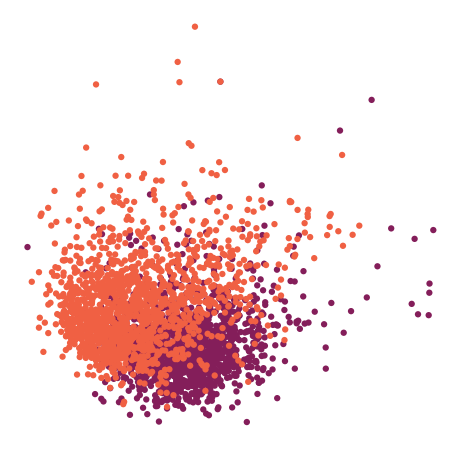

In [46]:
pca = PCA(n_components=2)
fit_x = pca.fit_transform(X_s)
scatter(fit_x, y)

/home/sovun/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f37cd2bcd00>)

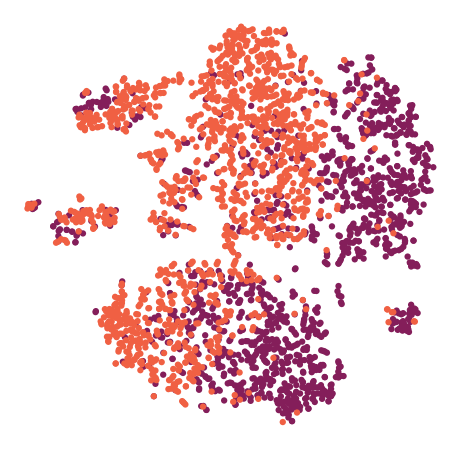

In [47]:
tsne = TSNE(n_components=2, perplexity = 20, early_exaggeration = 10, learning_rate=500)
fit_x = tsne.fit_transform(X_s)
scatter(fit_x, y)

In [48]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from skimage import io

In [49]:

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

In [50]:
china = io.imread('sova-splyushka.jpg') #load_sample_image("sova-splyushka.jpg")
china = np.array(china, dtype=np.float64) / 255
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))


In [51]:
def k_means_visualise(image_array, n_colors):
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)

    plt.figure(1)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

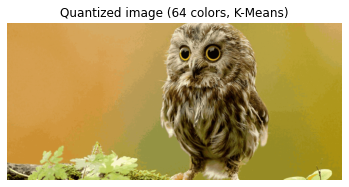

In [52]:
k_means_visualise(image_array, 64)

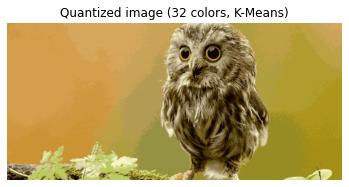

In [53]:
k_means_visualise(image_array, 32)

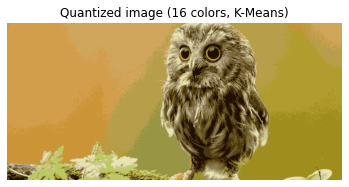

In [54]:
k_means_visualise(image_array, 16)

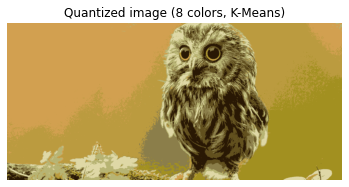

In [55]:
k_means_visualise(image_array, 8)

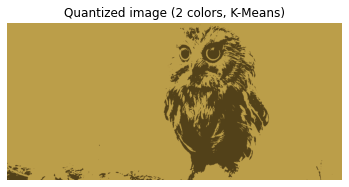

In [56]:
k_means_visualise(image_array, 2)

In [57]:
from numpy.random import multivariate_normal
from sklearn.mixture import GaussianMixture

In [58]:
t1 = multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
t2 = multivariate_normal([1, 5], [[3, 1], [1, 3]], 100)
X = np.concatenate((t1, t2))

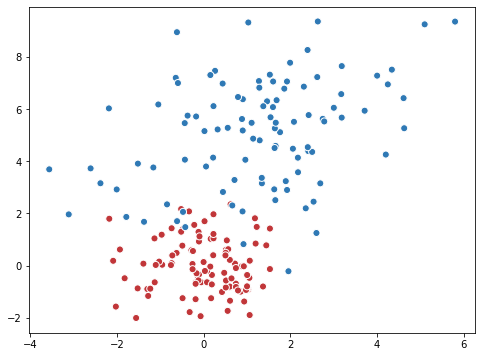

In [59]:
_, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:,0], X[:,1], c=[0 if i < 100 else 1 for i in range(200)], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

In [60]:
X = shuffle(X)

In [61]:
gm = GaussianMixture(n_components=2, covariance_type='full').fit(X)


In [62]:
gm.weights_

array([0.52054262, 0.47945738])

In [63]:
gm.means_

array([[0.043388  , 0.05572404],
       [1.24479334, 5.19806797]])

In [64]:
gm.covariances_

array([[[ 0.81664651, -0.03102691],
        [-0.03102691,  1.13032352]],

       [[ 3.2345623 ,  1.37131226],
        [ 1.37131226,  3.94929144]]])

In [65]:
y = gm.predict(X)

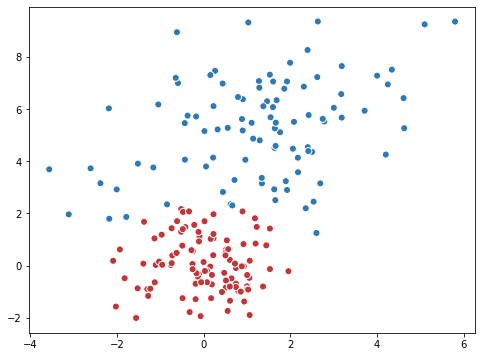

In [66]:
_, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:,0], X[:,1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

# NLP

In [67]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
stopWords = set(stopwords.words('english'))
# import re

In [68]:
df = pd.read_csv('Emotion_final.csv')
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [69]:
labels = sorted(list(set(df.Emotion)))
for i in range(len(labels)):
    df.Emotion[df.Emotion == labels[i]] = i

In [70]:
labels_map = {i: labels[i] for i in range(len(labels))}
labels_map

{0: 'anger', 1: 'fear', 2: 'happy', 3: 'love', 4: 'sadness', 5: 'surprise'}

In [71]:
df

,Text,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
21454,Melissa stared at her friend in dism,1
21455,Successive state elections have seen the gover...,1
21456,Vincent was irritated but not dismay,1
21457,Kendall-Hume turned back to face the dismayed ...,1


### tokenizing

In [192]:
def preprocessing(text, tokenizer, lemmantizer, stemmer, good_words = []):
    tokenized_list = []
    for word in tokenizer(text):
        if word.isalpha():
            word=word.lower()
            word=stemmer(lemmantizer(word))
            if len(good_words) > 0:
                if word not in stopWords and word in good_words:    
                    tokenized_list.append(word)
                    # print(word)
            else:
                if word not in stopWords:    
                    tokenized_list.append(word)
    return ' '.join(tokenized_list)

In [73]:
def word_cloud(df):

    text = ' '.join([i for i in df.Text])
    # print(text)
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [75]:
tokenizer = word_tokenize
lemmantizer = WordNetLemmatizer().lemmatize
stemmer = SnowballStemmer('english').stem

for i in range(len(df)):
    df.Text[i] = preprocessing(df.Text[i], tokenizer, lemmantizer, stemmer)

In [76]:
df

,Text,Emotion
0,didnt feel humili,4
1,go feel hopeless damn hope around someon care ...,4
2,im grab minut post feel greedi wrong,0
3,ever feel nostalg fireplac know still properti,3
4,feel grouchi,0
...,...,...
21454,melissa stare friend dism,1
21455,success state elect seen govern parti pummel d...,1
21456,vincent wa irrit dismay,1
21457,turn back face dismay coup,1


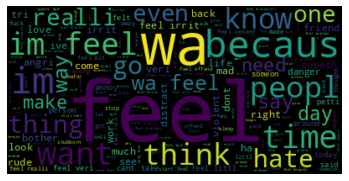

In [77]:
word_cloud(df[df.Emotion == 0])

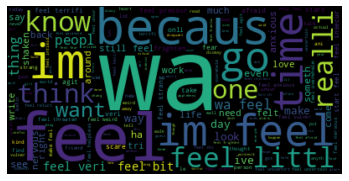

In [78]:
word_cloud(df[df.Emotion == 1])

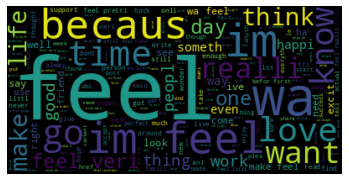

In [79]:
word_cloud(df[df.Emotion == 2])

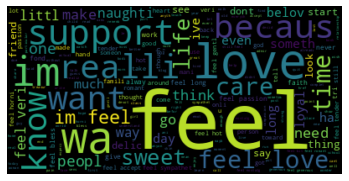

In [80]:
word_cloud(df[df.Emotion == 3])

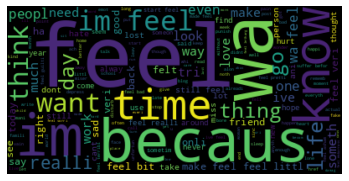

In [81]:
word_cloud(df[df.Emotion == 4])

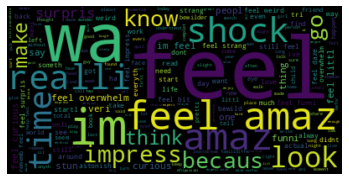

In [82]:
word_cloud(df[df.Emotion == 5])

In [83]:
X = df['Text']
y = df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [84]:
vectorizer = TfidfVectorizer(stop_words='english')
tf_idf = vectorizer.fit(X_train)
X_train = tf_idf.transform(X_train)
X_test = tf_idf.transform(X_test)


In [ ]:
X_train

<14377x13520 sparse matrix of type '<class 'numpy.float64'>'
	with 115486 stored elements in Compressed Sparse Row format>

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
forest = RandomForestClassifier(n_estimators=300, max_depth=300).fit(X_train, y_train.astype(np.int64))

# pred = forest.predict(X_train)
# print(classification_report(y_train.astype(np.int64), pred))
pred = forest.predict(X_test)
print(classification_report(y_test.astype(np.int64), pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       993
           1       0.83      0.83      0.83       871
           2       0.83      0.89      0.85      2279
           3       0.78      0.62      0.69       550
           4       0.89      0.88      0.89      2110
           5       0.73      0.73      0.73       279

    accuracy                           0.84      7082
   macro avg       0.82      0.80      0.81      7082
weighted avg       0.84      0.84      0.84      7082



In [208]:
tf_idf = vectorizer.fit(df['Text'])
not_often = tf_idf.idf_ > 4
not_rare = tf_idf.idf_ < 7

mask = not_often * not_rare

# feature_names = np.array(tf_idf.get_feature_names())[mask]
good_words = np.array(tf_idf.get_feature_names())[mask]
for i in range(len(df)):
    df.Text[i] = preprocessing(df.Text[i], tokenizer, lemmantizer, stemmer, good_words)

In [212]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
def display_topics(df, num_top_words = 5):
    tf_vectorizer = CountVectorizer(stop_words='english')
    for i in range(len(labels)):
        lda = LatentDirichletAllocation(n_components = 1).fit(tf_vectorizer.fit_transform([ j for j in df.Text[df.Emotion == i]]))
        print (f"Topic {labels_map[i]}: {[tf_vectorizer.get_feature_names()[i] for i in lda.components_[0].argsort()[-1: -num_top_words:-1]]}")

In [210]:
display_topics(df, 15)

Topic anger: ['want', 'irrit', 'peopl', 'think', 'thing', 'littl', 'hate', 'veri', 'angri', 'way', 'say', 'bit', 'day', 'start']
Topic fear: ['littl', 'veri', 'bit', 'want', 'anxious', 'think', 'thing', 'peopl', 'start', 'day', 'strang', 'look', 'ive', 'agit']
Topic happy: ['veri', 'want', 'love', 'day', 'think', 'peopl', 'life', 'thing', 'good', 'someth', 'littl', 'work', 'pretti', 'need']
Topic love: ['love', 'support', 'want', 'care', 'veri', 'long', 'sweet', 'life', 'peopl', 'passion', 'need', 'think', 'littl', 'accept']
Topic sadness: ['want', 'day', 'thing', 'littl', 'think', 'ive', 'veri', 'life', 'peopl', 'bit', 'dont', 'look', 'start', 'way']
Topic surprise: ['amaz', 'overwhelm', 'weird', 'strang', 'littl', 'look', 'think', 'bit', 'peopl', 'veri', 'thing', 'say', 'day', 'rememb']
